<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Segment_Ajuste_mar_2021/Fig_05_BIG_Segmentation_knn_abril_13_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 11.0MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 308 (delta 23), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (308/308), 78.60 MiB | 42.58 MiB/s, done.
Resolving deltas: 100% (146/146), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 63 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)


In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     103   79.167122   77.378075  ...    9.506080    9.868225    9.191441
1     111   61.513432   60.558960  ...   10.574629   10.433406   10.819901
2     160  110.973122   92.983749  ...    5.130000    5.624375    5.571875
3     111   54.486404   56.068092  ...  101.016800  101.059410  103.392990
4     127   85.958099   62.180298  ...    4.865459    0.998326    0.347201
5     111  102.136192   97.560593  ...   21.069801   20.881260   23.356871
6     102   64.058060   64.913887  ...   83.569016   82.682823   81.897743
7     193   45.525650   55.717705  ...  107.404167  123.317413   99.583130
8     182  108.147942  108.905334  ...   27.289944   16.562130    2.739645
9     148   42.807896   43.269543  ...   86.040184   86.372543   87.549316
10    187  107.617012  112.618118  ...    7.155395   10.413052    7.325345
11    170   71.377586   68.801796  ...   46.624920   37.119587    6.856609
12    120   29.715555   3

In [11]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
filename = 'model_knn.pkl'
model = joblib.load(filename)

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 63 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [12]:
cont = 0; num =25
img_graos = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  del df['Width']
  result = np.array(df)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

          0          1          2    ...        781        782        783
10   2.881666   0.684117   0.756594  ...  14.228472   6.907881   2.313611
5   14.820973  15.638577  16.169628  ...   0.000000   0.000000   0.000000
8    0.067215   0.000000   0.000000  ...   0.038409   0.065844   0.491084
42  41.662228  40.035561  39.422226  ...   8.222223  13.471113  12.911112
7    0.000000   0.068478   0.000000  ...  55.951263  59.952400  61.242115
23   1.172077   3.442463   2.111111  ...   0.000000   0.000000   0.000000
25  29.500340  26.899204  25.089830  ...  47.177086  41.204159  31.328014
9   33.966080  35.676899  37.135380  ...   9.594747   9.214391   9.344182
6   70.495613  77.313599  79.776512  ...   9.241587   9.206711   9.017815
12  80.620789  82.531433  81.006317  ...   9.507210  10.576775  10.931002
19  38.619823  43.763317  49.349121  ...   2.258876   1.136095   0.803254
17   1.629657   2.392988   5.444851  ...   0.000000   0.000000   0.000000
26   2.154941   1.767397   0.568627  .

In [13]:
np.sum(np.array(img_graos.iloc[[1],:]))/(28*28)

23.677186762117568

In [14]:
Size = 28

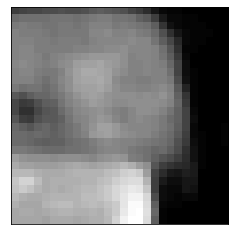

In [15]:
data=np.array(img_graos.iloc[[1],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

In [16]:
np.sum(np.array(img_graos.iloc[[3],:]))/(28*28)

9.830749336345008

In [17]:
img_graos.iloc[[3],:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
42,41.662228,40.035561,39.422226,39.804451,41.057785,42.26667,42.506676,42.933334,44.471115,46.017784,47.51556,47.453335,46.564445,46.511116,44.24445,45.382229,45.617783,44.275558,43.822224,39.653339,33.137779,23.751114,14.795557,40.884445,89.711121,94.146675,95.066673,97.448898,42.240005,41.520004,41.928898,42.631115,43.982227,45.564449,45.404449,46.044449,47.67112,48.702229,47.986671,46.608891,...,1.066667,0.995556,0.995556,0.995556,1.208889,1.084445,1.422222,1.333333,1.315556,1.12,1.595556,1.871111,9.404446,9.306667,9.053333,8.85778,9.68,9.235558,9.217779,9.057779,9.680001,9.644445,9.36889,9.208889,9.137779,8.906668,8.906668,9.155557,8.933334,8.968889,8.800001,9.20889,8.462223,8.533334,8.435556,8.666668,8.311112,8.222223,13.471113,12.911112


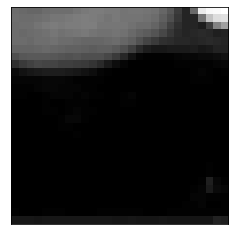

In [18]:
data=np.array(img_graos.iloc[[3],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

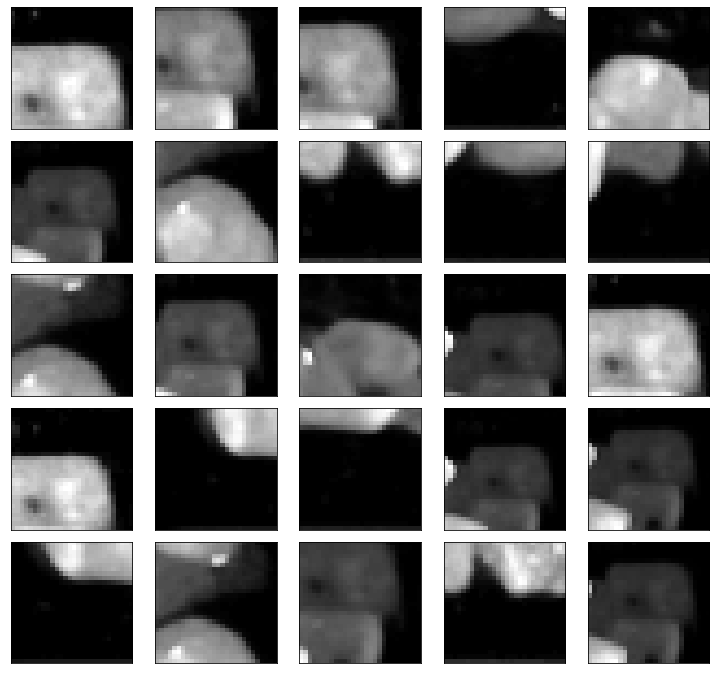

In [19]:
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(img_graos.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)